# Algoritmo de Bernstein-Vazirani

In [1]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

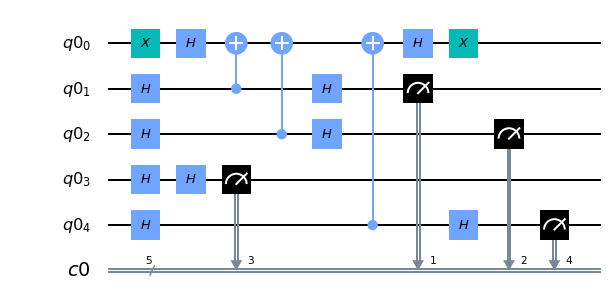

In [2]:
### BV - procedimento que constrói o circuito de Bernstein-Vazirani
### n  - número de qubits do primeiro registrador
### s  - número inteiro na notação decimal da cadeia de bits a ser encontrada
def BV(n,s):
    global q,c,circ
    if 2**n<=s:
        raise ValueError("Expecting s<2**n")
    # define o circuito com n+1 qubits
    q = QuantumRegister(n+1)
    c = ClassicalRegister(n+1)
    circ = QuantumCircuit(q,c)
    # portas X e Hadamard
    circ.x(q[0])
    circ.h(q[0])
    for i in range(1,n+1):
        circ.h(q[i])
    # oráculo
    s2 = list(bin(s))[2:][::-1]
    for i in range(len(s2)):
        if s2[i]=='1':
            circ.cx(i+1,0)
    # portas X e Hadamard   
    circ.h(q[0])
    circ.x(q[0])
    for i in range(1,n+1):
        circ.h(q[i])
    # medição dos n qubits
    circ.measure(q[1:],c[1:])
    # q[0] sempre retorna 0

# EXEMPLO
BV(4,11)

circ.draw(output='mpl')

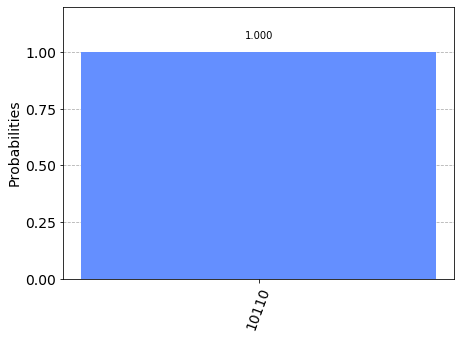

In [3]:
### simulating in qasm
simulator = BasicAer.get_backend('qasm_simulator')
job1 = execute(circ, simulator, shots=8024)
result1 = job1.result()
counting1 = result1.get_counts()
plot_histogram(counting1)

In [4]:
### Este comando deve ser usado uma única vez, pois o valor do token ficará gravado so seu laptop.
### Vá na página do IBM Q Experience, clique no seu usuário (boneco no alto a direita) para entrar na sua conta. 
### Copie o 'API Token' e cole no comando abaixo.
from qiskit import IBMQ
#IBMQ.save_account('API_Token')

In [5]:
### computadores quânticos disponíveis para a sua conta
from qiskit import IBMQ
provedor = IBMQ.load_account()
provedor.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [6]:
### Escolha um dos nomes dos computadores
machine_name = 'ibmq_ourense'   #'ibmqx2'  #'ibmq_vigo'
maquina = provedor.get_backend(machine_name)

In [7]:
job2 = execute(circ, backend = maquina, shots = 1024)
job_monitor(job2)
result2 = job2.result()
counting2 = result2.get_counts()
counting2

Job Status: job has successfully run


{'00110': 65,
 '10010': 56,
 '10100': 106,
 '11010': 9,
 '00100': 105,
 '01010': 2,
 '01110': 3,
 '11100': 8,
 '10110': 535,
 '00000': 39,
 '11110': 19,
 '11000': 4,
 '01000': 3,
 '00010': 40,
 '10000': 27,
 '01100': 3}

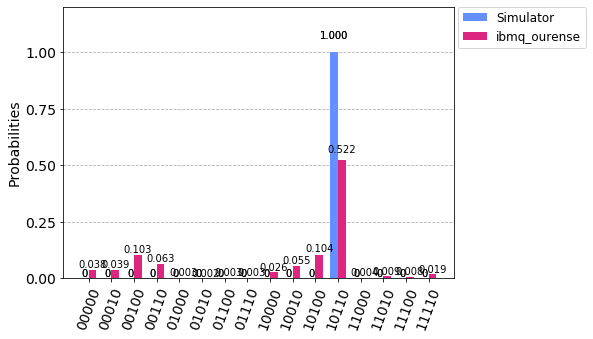

In [8]:
hist = plot_histogram([counting1,counting2],legend=['Simulator', machine_name])
hist